# Transforming data

## Python setup

In [2]:
# Setup
%matplotlib inline
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

sns.set_style("white")
# Custom colors
blue = "#3F83F4"
blue_dark = "#062089"
blue_light = "#8DC0F6"
blue_lighter = "#BBE4FA"
grey = "#9C9C9C"
grey_dark = "#777777"
grey_light = "#B2B2B2"
orange = "#EF8733"
colors_blue = [blue, blue_light]

## Import data

In [3]:
ROOT = "https://raw.githubusercontent.com/kirenz/modern-statistics/main/data/"
DATA = "county.csv"

df = pd.read_csv(ROOT + DATA)

## Log transformations

### Example unemployment rate

In [13]:
df['unemployment_rate'].agg(['skew']).transpose()

skew    1.877885
Name: unemployment_rate, dtype: float64

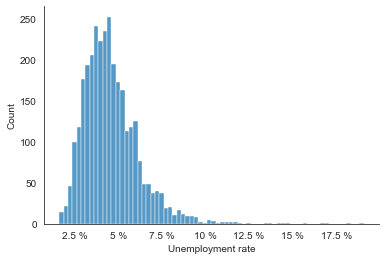

In [5]:
# A histogram of the percentage of unemployed in all US counties.
fig, ax = plt.subplots()

sns.histplot(data=df, x= "unemployment_rate", palette=colors_blue)

ax.xaxis.set_major_formatter(ticker.EngFormatter('%'))
plt.xlabel("Unemployment rate")
sns.despine();

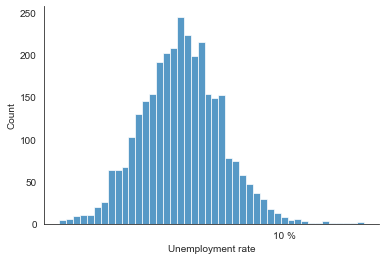

In [6]:
# A histogram of log10-transformed unemployed percentages
fig, ax = plt.subplots()

sns.histplot(data=df, x= "unemployment_rate", palette=colors_blue, log_scale=True)

ax.xaxis.set_major_formatter(ticker.EngFormatter('%'))
plt.xlabel("Unemployment rate")
sns.despine();

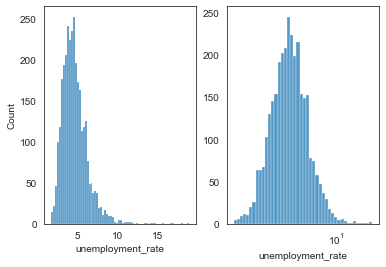

In [7]:
# Both plots 
fig, ax =plt.subplots(1,2)
sns.histplot(data=df,  x= "unemployment_rate", palette=colors_blue, ax=ax[0])
sns.histplot(data=df,  x= "unemployment_rate", palette=colors_blue, log_scale=True, ax=ax[1]);

plt.ylabel("");


### Example population

In [17]:
# Skew
df[['pop2017', 'pop_change']].agg(['skew']).transpose()

,skew
pop2017,13.715670
pop_change,1.158694


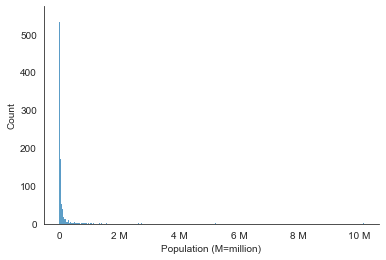

In [9]:
#  A histogram of population in all US counties in 2017
fig, ax = plt.subplots()

sns.histplot(data=df,  x= "pop2017", palette=colors_blue)

ax.xaxis.set_major_formatter(ticker.EngFormatter(''))
plt.xlabel("Population (M=million)")
sns.despine();

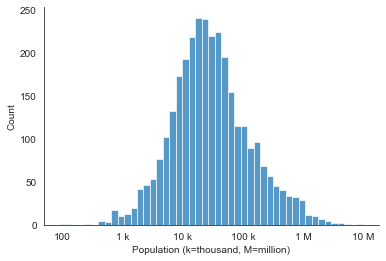

In [10]:
# A histogram of log10-transformed values
fig, ax = plt.subplots()

sns.histplot(data=df, x= "pop2017", palette=colors_blue, log_scale=True)

ax.xaxis.set_major_formatter(ticker.EngFormatter(''))
plt.xlabel("Population (k=thousand, M=million)")
sns.despine();

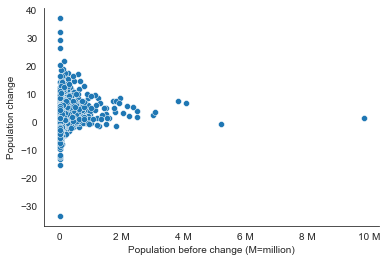

In [11]:
# Scatterplot of population change against the population before the change
fig, ax = plt.subplots()

sns.scatterplot(data=df, x="pop2010", y="pop_change")

ax.xaxis.set_major_formatter(ticker.EngFormatter(''))
plt.xlabel("Population before change (M=million)")
plt.ylabel("Population change")
sns.despine();

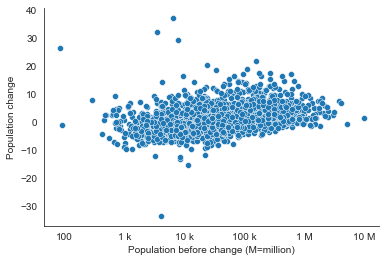

In [12]:
#  population size has been log-transformed.
fig, ax = plt.subplots()

ax = sns.scatterplot(data=df, x="pop2010", y="pop_change")

ax.set_xscale('log')
ax.xaxis.set_major_formatter(ticker.EngFormatter(''))
plt.xlabel("Population before change (M=million)")
plt.ylabel("Population change")
sns.despine();